In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.dates as mdates
aux = np.load('/home/richard/Escritorio/datos/database.npz', allow_pickle='TRUE')
n_block = aux['n_block']
time_b = aux['time_b']
size = aux['size']
ntx = aux['ntx']
bits = aux['bits']
chainwork = aux['chainwork']
strippedsize = aux['strippedsize']
weight = aux['weight']
total = aux['total']


In [ ]:
print(n_block[1])
print(type(n_block))
print(type(n_block[1]))

print('size')
print(size[1])
print(type(size))
print(type(size[-1]))
print('ntx')
print(ntx[1])
print(type(ntx))
print(type(ntx[1]))
print('bits')
print(bits[1])
print(type(bits))
print(type(bits[1]))
print('chainwork')
print(chainwork[1])
print(type(chainwork))
print(type(chainwork[1]))
print('spri ')
print(strippedsize[1])
print(type(strippedsize))
print(type(strippedsize[1]))
print('weight ')
print(weight[1])
print(type(weight))
print(type(weight[1]))
print('total')
#print(total[1])
print(type(total))
#print(type(total[1]))




In [2]:



FECHAS = pd.to_datetime(time_b)
print(FECHAS[2]) 
print(type(FECHAS))
print(type(FECHAS[2]))

2009-01-09 03:02:53
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


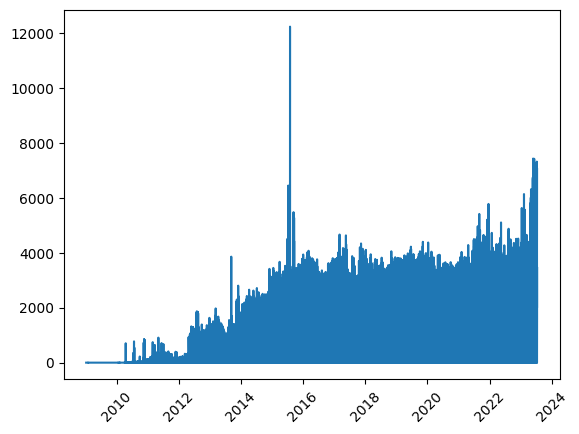

In [23]:
#===========NTX VS FECHAS
#fig,ax = plt.subplot()
plt.plot(FECHAS,ntx,label="transacciones  vs tiempo")
plt.xticks(rotation=45)
plt.show()

/home/richard/TRABAJO/BitcoinResearch/scripts/.venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


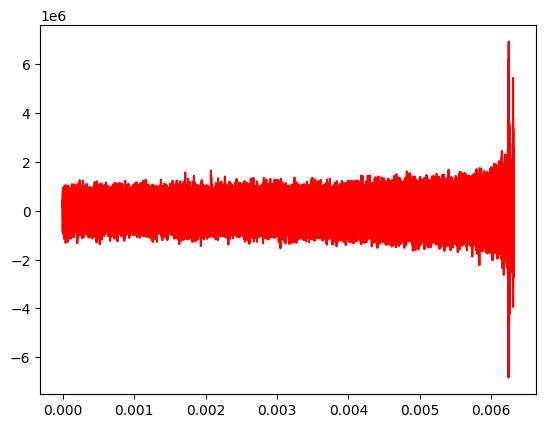

In [3]:
#=======TRANFORMADA SIN INTERPOLACION=======
tiempo_segundos=(FECHAS-FECHAS[0]).total_seconds()
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo
transformada=np.fft.fft(ntx)
#crea una variable que alverga la transformada a las transacciones
frecuencias=np.fft.fftfreq(len(ntx),d=(tiempo_segundos[1]-tiempo_segundos[0]))
#creamos las frecuencias fundamentales para la transformada

# n = len(frecuencias)
# frecuencias_shifted = np.fft.fftshift(frecuencias)
# fs=frecuencias_shifted[n//2:]
# transformada_shifted = np.fft.fftshift(transformada)
# ts=transformada_shifted[n//2:]
#plt.plot(frecuencias_shifted[n // 2:], np.abs(transformada_shifted[n // 2:]), color='r')
#plt.plot(fs[100:], np.abs(ts[100:]), color='r')
fpp=frecuencias[frecuencias>0]
# print(len(frecuencias),'===',len(transformada))
# print(len(fpp))
plt.plot(fpp[:-1000], transformada[399135:-1000],color='r')#np.abs(transformada[399135:-10000]), color='r')
# print('algo',len(transformada[399135:]))
# print(len(frecuencias[11000:]))
# print(np.argmax(np.abs(transformada)))
# print(transformada[2])

381341


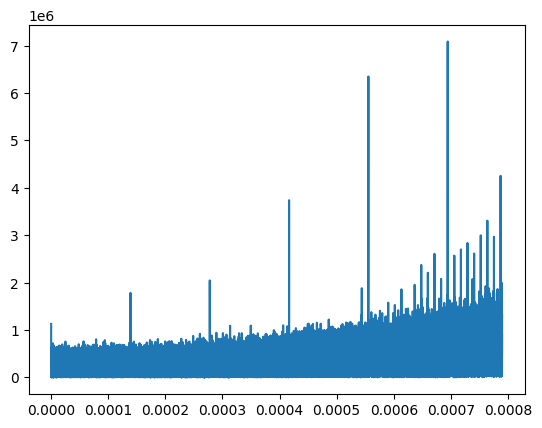

In [12]:
tiempo_segundos=(FECHAS-FECHAS[0]).total_seconds()
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado=np.arange(tiempo_segundos[0],tiempo_segundos[-1],600)
#creamos tiempos equiespaciados
ntx_interpolado=np.interp(tiempo_equiespaciado,tiempo_segundos,ntx)
#interpolamos las transacciones
transformada=np.fft.fft(ntx_interpolado)
#trabajamos las trans interpoladas
frecuencias=np.fft.fftfreq(len(ntx_interpolado),d=(600))
#TTF=transformada[transformada>0]
FRE=frecuencias[frecuencias>0]
print(len(FRE))
#plt.plot(frecuencias[11000:],transformada[11000:])#, np.abs(transformada[11000:]), color='r')
plt.plot(FRE[:-20000],np.abs(transformada[381343:-20000]))#, np.abs(transformada[11000:]), color='r')
#print(len(transformada))
#print(len(ntx_interpolado))
#print(tiempo_segundos[0]-tiempo_segundos[-1])
#print(tiempo_segundos[2])

20999
0.0018501762870542335 0.001849999911812379


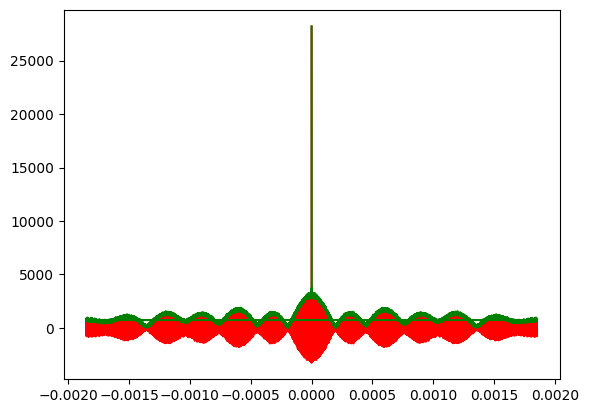

In [14]:
#=======TRANFORMADA SIN INTERPOLACION=======
tiempo_segundosT=(FECHAS[42001:63000]-FECHAS[42001]).total_seconds()
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo
transformadaT=np.fft.fft(ntx[42001:63000])
#crea una variable que alverga la transformada a las transacciones
frecuenciasT=np.fft.fftfreq(len(ntx[42001:63000]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))
#creamos las frecuencias fundamentales para la transformada
plt.plot(frecuenciasT[:],transformadaT,color='r')# np.abs(transformadaT[:]), color='r')
plt.plot(frecuenciasT[:], np.abs(transformadaT[:]), color='g')

print(len(frecuenciasT))
#print(np.argmax(frecuenciasT[10:]))
#print(np.argmin(frecuenciasT[10:]))
print(frecuenciasT[10490],frecuenciasT[10489])


In [17]:
print(len(ntx[405:]))

797863


In [6]:
#================transpara cada halving
#print(FECHAS[:])
primero=FECHAS[:21000]
segundo=FECHAS[21001:42000]
tercero=FECHAS[42001:63000]
cuarto=FECHAS[63001:]
#print(primero[:])

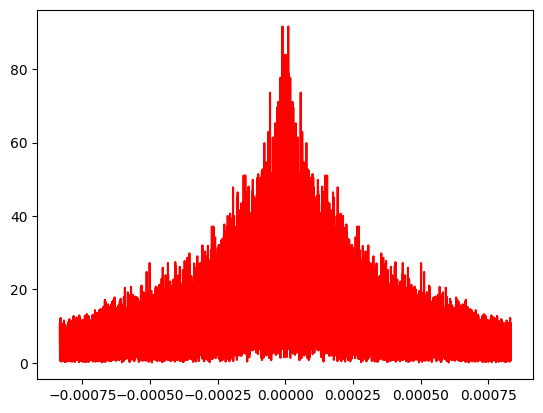

In [8]:
tiempo_segundos1=(FECHAS[:21000]-FECHAS[0]).total_seconds()
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado1=np.arange(tiempo_segundos1[0],tiempo_segundos1[-1],600)
#creamos tiempos equiespaciados
ntx_interpolado1=np.interp(tiempo_equiespaciado1,tiempo_segundos1,ntx[:21000])
#interpolamos las transacciones
transformada1=np.fft.fft(ntx_interpolado1)
#trabajamos las trans interpoladas
frecuencias1=np.fft.fftfreq(len(ntx_interpolado1),d=(600))
plt.plot(frecuencias1[2:], np.abs(transformada1[2:]), color='r')

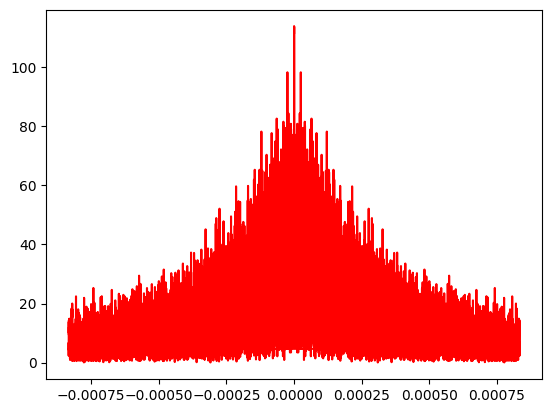

In [11]:
tiempo_segundos2=(FECHAS[21001:42000]-FECHAS[21001]).total_seconds()
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado2=np.arange(tiempo_segundos2[0],tiempo_segundos2[-1],600)
#creamos tiempos equiespaciados
ntx_interpolado2=np.interp(tiempo_equiespaciado2,tiempo_segundos2,ntx[21001:42000])
#interpolamos las transacciones
transformada2=np.fft.fft(ntx_interpolado2)
#trabajamos las trans interpoladas
frecuencias2=np.fft.fftfreq(len(ntx_interpolado2),d=(600))
plt.plot(frecuencias2[2:], np.abs(transformada2[2:]), color='r')
#plt.plot( np.abs(transformada2[2:]),frecuencias2[2:], color='r')

autismo 17967


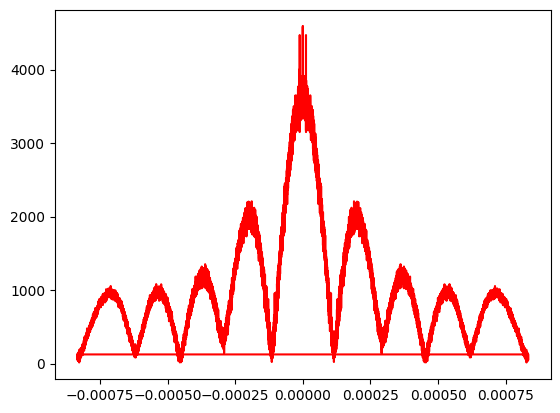

In [12]:
tiempo_segundos3=(FECHAS[42001:63000]-FECHAS[42001]).total_seconds()
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado3=np.arange(tiempo_segundos3[0],tiempo_segundos3[-1],600)
#creamos tiempos equiespaciados
ntx_interpolado3=np.interp(tiempo_equiespaciado3,tiempo_segundos3,ntx[42001:63000])
#interpolamos las transacciones
transformada3=np.fft.fft(ntx_interpolado3)
#trabajamos las trans interpoladas
frecuencias3=np.fft.fftfreq(len(ntx_interpolado3),d=(600))
plt.plot(frecuencias3[2:], np.abs(transformada3[2:]), color='r')
print("autismo",len(transformada3))

342850
342850


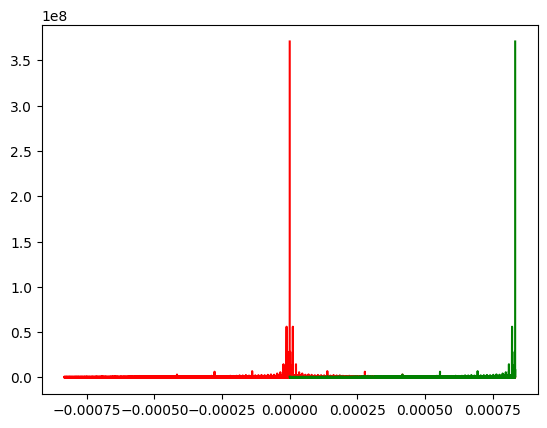

In [21]:
tiempo_segundos4=(FECHAS[63001:]-FECHAS[63001]).total_seconds()
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo

tiempo_equiespaciado4=np.arange(tiempo_segundos4[0],tiempo_segundos4[-1],600)
#creamos tiempos equiespaciados
ntx_interpolado4=np.interp(tiempo_equiespaciado4,tiempo_segundos4,ntx[63001:])
#interpolamos las transacciones
transformada4=np.fft.fft(ntx_interpolado4)
#trabajamos las trans interpoladas
frecuencias4=np.fft.fftfreq(len(ntx_interpolado4),d=(600))

FR4=frecuencias4[frecuencias4>0]
print(len(FR4))
print(len(transformada4[342851:]))
plt.plot(frecuencias4[100:], np.abs(transformada4[100:]), color='r')
plt.plot(FR4[:], np.abs(transformada4[342851:]), color='g')


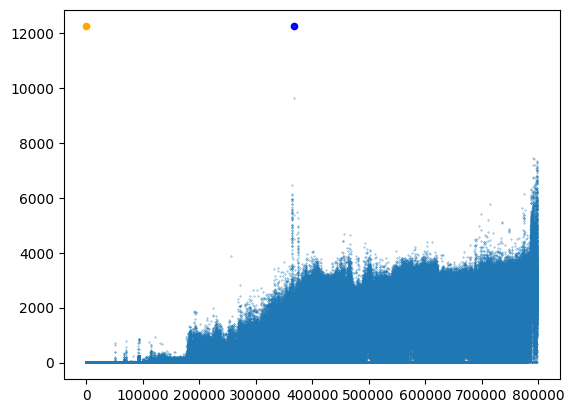

In [30]:
fig, ax = plt.subplots()
indice=np.where((ntx==np.max(ntx)))[0][0]
ntx_max=ntx[indice]

indice2=np.where((ntx==np.min(ntx)))[0][0]
ntx_min=ntx[indice]


ax.scatter(n_block[indice], ntx_max, color ='blue',label='Máximo', s=20)
ax.scatter(n_block[indice2], ntx_min, color ='orange',label='Minimo', s=20)
ax.scatter(n_block,ntx ,label="numero de trans, por bloque", s=0.1,alpha=0.8)

10499
10499
20999
10489
10490
0.49954759750464306 0.49949997618934233


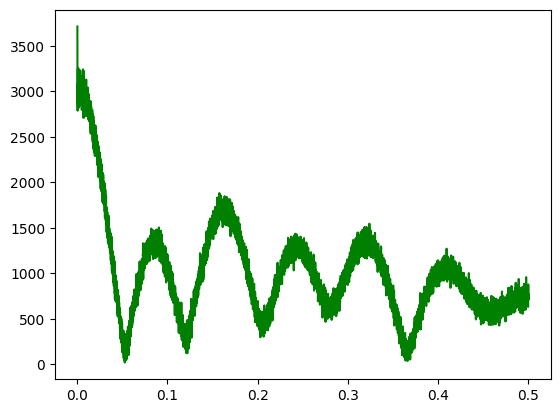

In [41]:
#=======TRANFORMADA SIN INTERPOLACION=======
tiempo_segundosT=(n_block[42001:63000]-n_block[42001])
#convierte el tiempo en segundos descontandolos desde el primer dato de tiempo
transformadaT=np.fft.fft(ntx[42001:63000])
#crea una variable que alverga la transformada a las transacciones
frecuenciasT=np.fft.fftfreq(len(ntx[42001:63000]),d=(tiempo_segundosT[1]-tiempo_segundosT[0]))
#creamos las frecuencias fundamentales para la transformada
FREK4=frecuenciasT[frecuenciasT>0]
print(len(FREK4))
print(len(transformadaT[:10499]))
#plt.plot(frecuenciasT[2:], np.abs(transformadaT[2:]), color='r')
plt.plot(FREK4[2:], np.abs(transformadaT[2:10499]), color='g')
print(len(frecuenciasT))
print(np.argmax(frecuenciasT[10:]))
print(np.argmin(frecuenciasT[10:]))
print(frecuenciasT[10490],frecuenciasT[10489])

In [ ]:
print(len(ntx))
print(len(n_block))

fft_ventas = np.fft.fft(ntx)

# Calcular las frecuencias correspondientes a las componentes de la FFT
frecuencias = np.fft.fftfreq(len(ntx), n_block[1] - n_block[0])
#plt.stem(frecuencias, np.abs(fft_ventas))
ax.scatter(fft_ventas,frecuencias ,label="numero de trans, por bloque", s=0.1,alpha=0.8)

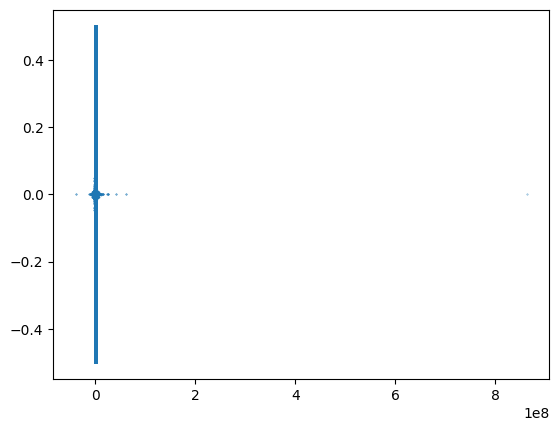

In [25]:
fig, ax = plt.subplots()
indice=np.where((ntx==np.max(ntx)))[0][0]
ntx_max=ntx[indice]

indice2=np.where((ntx==np.min(ntx)))[0][0]
ntx_min=ntx[indice]


#ax.scatter(n_block[indice], ntx_max, color ='blue',label='Máximo', s=20)
#ax.scatter(n_block[indice2], ntx_min, color ='orange',label='Minimo', s=20)
#ax.scatter(n_block,ntx ,label="numero de trans, por bloque", s=0.1,alpha=0.8)
ax.scatter(fft_ventas,frecuencias ,label="numero de trans, por bloque", s=0.1,alpha=0.8)